<h1> <center> Natural Language Processing in Risk and Finance </h1>
<h3> <center> Developing a </h3>
<center> <small>by <a href="https://juliandoerr.com">Julian Dörr</a></small>
<br>
<br>

_________________________
_________________________

## 1. <a id='toc1_'></a>[About this Course](#toc0_)

Course outline

<a id='toc0_'></a>    
- 1. [About this Course](#toc1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=4
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

You will find all course material and setup instructions in the following [repository](https://github.com/julienOlivier3/risk-analytics/tree/main/2_nlp).

### <a id='toc1_1_'></a>What you will learn

- **Fundamental Concepts**: Overview of ML and its relationship with Artificial Intelligence (AI) and Deep Learning (DL).

## What is Natural Language Processing?

Natural Language Processing (NLP) is a specialized branch of AI where methods from the field of Machine Learning and Deep Learning are applied to bridge the gap between human communication and machine understanding. 

<img src="img/ai_ml_dl_nlp.png" alt="AI, ML, DL & NLP" style="width: 55vw; min-width: 330px;">
<p><small>Image source: Author</small></p>

<font color="#58e4d4"><b>Artificial Intelligence (AI)</b></font>: **The Broad Umbrella**

AI is the overarching field that encompasses all technologies and systems designed to **simulate human intelligence**. This includes tasks like reasoning, problem-solving, learning, and decision-making.

<font color="#20b49c"><b>Machine Learning (ML)</b></font>: **The Foundation**

Machine learning is a subset of AI that enables systems to **learn from data** and improve their performance over time without being explicitly programmed. ML algorithms identify patterns in data and use these patterns to **make predictions or decisions**.

<font color="#086c5c"><b>Deep Learning (DL)</b></font>: **The Engine Behind Generative AI**

Deep learning is a specialized branch of ML that uses **artificial neural networks** inspired by the human brain. These networks are particularly effective at processing large amounts of **unstructured data**, such as images, text, and audio.

<font color="#08544c"><b>Natural Language Processing (NLP)</b></font>: **A Key Application Area**

Natural language processing is a **specialized branch of AI** that focuses on **enabling machines to understand, interpret, and generate human language**. It bridges the gap between human communication and machine understanding.

NLP draws on concepts from linguistics, computer science, and AI to process and analyze natural language data. It is often **powered by ML and DL techniques**, which help machines learn from vast amounts of text data and improve their language understanding capabilities.

## <a id='toc3_'></a>Application of Natural Language Processing in Risk Management

NLP in risk management enhances the ability to **analyze** unstructured data, such as **news articles, social media, and customer feedback, to identify potential risks, emerging trends, and fraudulent activities**. By leveraging techniques like sentiment analysis, named entity recognition, and text summarization, NLP can **automate the extraction of relevant information**, improve accuracy, and **enable faster response times**. 

### <a id='toc3_2_'></a>A real-world use case: Automated Claims Processing

In the following, we will work on a real-world use case that **insurance companies** typically face. It is the process of **reviewing an insurance claim submitted by policyholders** to the insurance company. 

Instead of dealing with claims manually, **NLP algorithms are used to extract relevant information** from unstructured data sources: claim forms, emails, and documents. Once done, they **automatically categorise and prioritise claims** based on their severity and complexity, ensuring that urgent or complex claims receive prompt attention while routine claims are processed efficiently.

> An **insurance claim** is a formal request made by a policyholder to an insurance company for coverage for losses or damages incurred that are covered under the insurance policy.

Claims processing is a multi-step process which bears great potential for automation using NLP techniques.

<img src="img/claims_processing.png" alt="Claims processing" width="1000" height="300"/>
<p><small>Image source: <a href="https://www.astera.com/de/type/blog/automated-claims-processing/">Astera</a></small></p>

## <a id='toc4_'></a>Developing an Automated Claims Processing Model

### Data inspection

In [1]:
import pandas as pd

Read data.

In [2]:
df_claims = pd.read_csv('data/claims.csv')

In [3]:
df_claims.head(3)

,claim_description
0,THE IV WAS MAKING A LEFT TURN ON A GREEN ARROW...
1,CLAIMANT ALLEGES SHE SUFFERED INJURIES IN AN E...
2,"IV PASSENGER SUSTAINED INJURIES, OV AND IV COL..."


Remove null values.

In [4]:
df_claims.claim_description.isnull().sum()

np.int64(227)

In [5]:
df_claims = df_claims[df_claims.claim_description.notnull()]

In [6]:
df_claims.shape[0]

191463

We have data comprising 191,463 claim descriptions.

Lowercase all.

In [7]:
df_claims['claim_description'] = df_claims.claim_description.apply(lambda text: text.lower())

In [8]:
df_claims.sample(3).style

,claim_description
153438,due to collision causing damaged
131796,orly backed out of a parking spot and backed into the ov. ov is being worked on at the shop.
153802,rock from road - no one at fault d


<Axes: ylabel='Frequency'>

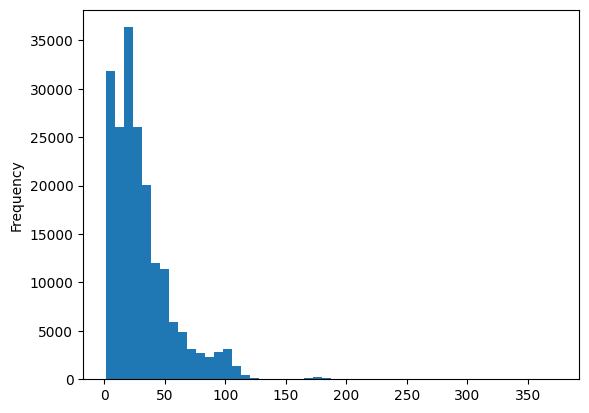

In [9]:
df_claims.claim_description.apply(lambda x: len(x.split(' '))).plot.hist(bins=50)

### Tokenization

Tokenization in NLP is the process of **breaking down text into smaller units called tokens**, which can be **words, phrases, or symbols**, and it is essential for enabling machines to analyze and understand unstructured text data effectively.

In the following we use the `re` module to define our custom tokenization logic. Regex is a powerful tool for string manipulation and can be used to extract tokens from text.

> **Regular expressions** (regex) are sequences of characters that define search patterns, allowing users to efficiently find, match, or manipulate strings of text based on specific criteria.

In [10]:
import re

tokenize_pattern = re.compile(r"(?u)\b\w\w+\b")

- \w: **word character** like letters (both lowercase and uppercase), digits or underscores. \w\w+ means that at least 2 word characters need to follow one another.
- \b: **word boundary** position where a word character is not followed or preceded by another word character.

In [11]:
test = tokenize_pattern.findall('This is a test.')

In [12]:
test

['This', 'is', 'test']

### Stopwords

**Stopwords are common words in a language**, such as "the," "is," and "and," that **carry little semantic value** and are often removed in NLP tasks to enhance the efficiency and accuracy of text analysis by focusing on more meaningful content.

There are pre-defined lists of stopwords for different languages. We use the English stopword list from the `nltk` library.

In [13]:
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords', quiet=True)

True

In [14]:
stopwords_en = [stopword.lower() for stopword in stopwords.words('english')]

len(stopwords_en)

198

In [15]:
stopwords_en[:10]

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

We now tokenize the claims descriptions and remove the stopwords. Moreover, we count how often each word occurs in the corpus of claims descriptions.

> In NLP, a **corpus** is a large and structured collection of authentic text data used for training, testing, and evaluating NLP models.

In [16]:
from tqdm import tqdm
from collections import Counter

word_counter = Counter()

# Process each claim and update the word counter
for claim in tqdm(df_claims.claim_description.values):
    # Split the claim into words using the regex pattern
    words = tokenize_pattern.findall(claim)

    # Filter out empty strings and stopwords and update the counter
    word_counter.update(word for word in words if word and word not in stopwords_en)

# Convert the Counter to a dictionary
word_frequencies = dict(word_counter)

100%|██████████| 191463/191463 [00:16<00:00, 11470.19it/s]


What are the most common words found in the corpus.

In [17]:
word_counter.most_common(20)

[('iv', 76356),
 ('vehicle', 55823),
 ('damage', 47182),
 ('ov', 46567),
 ('driver', 46394),
 ('injuries', 38978),
 ('claimant', 31274),
 ('rear', 28882),
 ('front', 27656),
 ('struck', 26369),
 ('reported', 26286),
 ('customer', 23884),
 ('hit', 23685),
 ('left', 21118),
 ('causing', 20370),
 ('side', 20037),
 ('right', 16849),
 ('fell', 16566),
 ('parked', 15541),
 ('incurred', 14004)]

This gives a clear picture of the domain of the text data: Insurance!

### Vocabulary

We now define the vocabulary which is essential for defining the scope of language the claims processing model can understand and process effectively.

> A **vocabulary** is a set of unique words in a corpus.

In [18]:
vocabulary = sorted(set(word_frequencies.keys()))

In [19]:
len(vocabulary)

93231

Our vocabulary, comprises 93,231 distinct words which is deemed to be a lot.

The Oxford Dictionary includes about 273,000 headwords, with 171,476 currently in use, 47,156 obsolete, and around 9,500 derivatives. It features over 600,000 total word forms, while some estimates suggest the English vocabulary may reach 1 million words, including specialized and foreign terms.

Let us have a look which words have entered our vocabulary.

In [20]:
vocabulary[:20]

['00',
 '000',
 '0000',
 '00000',
 '0000000115192chef',
 '0000000115196',
 '000001',
 '000001593',
 '000007',
 '000019',
 '000023',
 '000025',
 '000026',
 '000028',
 '000029',
 '000031',
 '000034',
 '000051',
 '00005753',
 '000058']

Due to our tokenizer definition number sequences are also extracted as tokens (remember that \w matches **word character** like letters *and* digits). Clearly, we do not want these number sequences as part of our vocabulary. Thus, we remove tokens from our vocabulary which are not part of the official English dictionary. Again, we make use of `nltk` which provides an extensive list of English words.

In [21]:
from nltk.corpus import words
nltk.download('words', quiet=True)
dictionary = set(words.words())

In [22]:
dictionary = {word.lower() for word in dictionary}

In [23]:
vocabulary = [word for word in vocabulary if word in dictionary]

In [24]:
len(vocabulary)

16283

We end up with a vocabulary of 16,283 distinct words.

In [25]:
vocabulary[-10:]

['zip',
 'zipper',
 'zonar',
 'zone',
 'zoned',
 'zoning',
 'zoo',
 'zoom',
 'zoster',
 'zucchini']

### Text vectorization

#### Word count vectorizer

One of the simplest methods for text vectorization is the **bag-of-words (BoW) representation**, where a BoW **vector has a length equal to the entire vocabulary**, $V$, and its **values** indicate the **frequency of each word**'s occurrence, $tf$, in a text.

BoW vectorization

<img src="img/tf.png" alt="BoW" width="600">
<p><small>Image source: Author</small></p>

In the following, we vectorize the corpus of claims descriptions via the number of occurences of each word from the vocabulary by using `scikit-learn`'s `CountVectorizer` class.

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
vectorizer = CountVectorizer(vocabulary=vocabulary, lowercase=True)

In [30]:
X = vectorizer.fit_transform(df_claims.claim_description.values)

Given the fitted `vectorizer`, we can now transform any string into a count vector representation.

In [31]:
claim = 'Broken rear window while parked. Window splinter caused damage to other vehicle.'

In [32]:
x = vectorizer.transform([claim])

In [48]:
from util import print_sparse_vector

print_sparse_vector(x, vocabulary)

broken   : 1884  	-> 1
damage   : 3708  	-> 1
rear     : 11408 	-> 1
splinter : 13421 	-> 1
vehicle  : 15535 	-> 1
window   : 16035 	-> 2


The resulting vector has $V$ = 16,283 elements with only 6 of it being non-zero. High-dimensional vectors with predominantly zero values are called **sparse vectors**.

Some words of the above claim are not part of the vocabulary because they are not in the dictionary ...

In [ ]:
'parked' and 'caused' in dictionary

False

... or because they are stopwords.

In [ ]:
'while' and 'to' and 'other' in stopwords_en

True

#### Weighted word count vectorizer

**Weighted Bag-of-Words** techniques like TF-IDF (Term Frequency-Inverse Document Frequency) **assign higher relevance to words that appear in fewer documents**, emphasizing their uniqueness by comparing a word's frequency in a specific text to its overall frequency in the corpus.

Tf-idf vectorization

<img src="img/tf-idf.png" alt="Tf-idf" width="800">
<p><small>Image source: Author</small></p>

We use **scikit-learn**'s **TfidfVectorizer** to get a weighted term frequency representation of the claims descriptions.

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
vectorizer = TfidfVectorizer(vocabulary=vocabulary, lowercase=True, use_idf=True, smooth_idf=False, sublinear_tf=False, norm=None)

In [36]:
X = vectorizer.fit_transform(df_claims.claim_description.values)

In [37]:
x = vectorizer.transform([claim])

In [39]:
from util import print_sparse_vector

print_sparse_vector(x, vocabulary)

Non-zero elements:
broken   : 1884  	-> 4.818420285039794
damage   : 3708  	-> 2.5850998857626366
rear     : 11408 	-> 3.134578877620683
splinter : 13421 	-> 9.761252475784687
vehicle  : 15535 	-> 2.6984041040430347
window   : 16035 	-> 11.53960467345044


The tf-idf value is derived as follows:

$tf\text{-}idf = term \, frequency \times log\left(\frac{number \, of \, documents}{document \, frequency}\right) + 1 = tf \times log\left(\frac{N}{df}\right) + 1$

For the word 'broken' the value can be derived as follows:

In [ ]:
word = re.compile(r'(?u)\bbroken\b')

df = df_claims.claim_description.apply(lambda text: bool(word.search(text))).sum()
df

np.int64(4205)

In [ ]:
N = df_claims.shape[0]
N

191463

In [ ]:
tf = 1

In [ ]:
import numpy as np

tf * np.log(N/df) + 1

np.float64(4.818420285039794)

The sparse, count-based methods mentioned earlier overlook the meanings of words and phrases. Words are not just letter combinations; they carry meanings and usage contexts that reflect their semantics, which go beyond their basic lexical properties.

The following vectorization techniques capture exactly those semantic properties of words.

### Static word embeddings

"You shall know a word by the company it keeps!" <br> 
*Firth (1957)*

This means that in order to represent the semantic meaning of a word, knowing its surrounding words is essential.

Word2Vec uses neural language modelling to generate vector representations of words. These vectors encapsulate the meaning of a word by considering the context provided by adjacent words.

Word2Vec comes in many variants. The variant below employs a shallow neural network where the learning task is to predict surrounding words given a target word as input. This approach is called Continuous Bag of Words (CBoW).

<img src="img/word2vec.png" alt="Word2vec" width="800">
<p><small>Image source: Author</small></p>

The word vector representations are a by-product of the training process generated in the weights matrix in the hidden layer. The word vector representations are called word embeddings.

<img src="img/word2vec_embedding.png" alt="Word embedding" width="800">
<p><small>Image source: Author</small></p>

In [2]:
import gensim.downloader

word2vec = gensim.downloader.load('glove-wiki-gigaword-50')

[==================================================] 100.0% 66.0/66.0MB downloaded


In [4]:
dir(word2vec)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_load_specials',
 '_log_evaluate_word_analogies',
 '_save_specials',
 '_smart_save',
 '_upconvert_old_d2vkv',
 '_upconvert_old_vocab',
 'add_lifecycle_event',
 'add_vector',
 'add_vectors',
 'allocate_vecattrs',
 'closer_than',
 'cosine_similarities',
 'distance',
 'distances',
 'doesnt_match',
 'evaluate_word_analogies',
 'evaluate_word_pairs',
 'expandos',
 'fill_norms',
 'get_index',
 'get_mean_vector',
 'get_normed_vectors',
 'get_vecattr',
 'get_vector',
 'has_index_for',
 'index2entity',
 'index2word',
 'index_to_key'

In [7]:
x = word2vec.get_vector("splinter")

In [16]:
word2vec.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.8523604273796082),
 ('throne', 0.7664334177970886),
 ('prince', 0.7592144012451172),
 ('daughter', 0.7473883628845215),
 ('elizabeth', 0.7460219860076904),
 ('princess', 0.7424570322036743),
 ('kingdom', 0.7337412238121033),
 ('monarch', 0.721449077129364),
 ('eldest', 0.7184861898422241),
 ('widow', 0.7099431157112122)]

In [9]:
from util import print_vector

print_vector(x, rounding_digit=4)